Work investigating the properties of a QC chain created by varying $\mu$ instead of the hopping parameter

In [2]:
import FileIO
using Printf
using Statistics
using LinearAlgebra
using Plots
using PyPlot

In [3]:
# # ****************************** Sec 0 ******************************
# # Functions for different sequence generation methods

function normal_crystal_gen(N::Int)
    return fill(1, N)
end

function incorrect_golden_ratio_sequence(N::Int, phi::Float64)
    """
    Generates a sequence of 1s and 2s based on the golden ratio, suitable for creating
    quasicrystal-like hopping terms in a Kitaev chain model.

    Parameters:
    N -- Length of the sequence (number of hopping terms)
    
    Returns:
    sequence -- Vector of 1s and 2s of length N
    """
    sequence = Vector{Int}(undef, N)

    for i in 1:N
        # Generate the fractional part of i * phi
        fractional_part = (i * phi) % 1
        # Assign 1 if fractional part < 0.5, otherwise assign 2
        sequence[i] = fractional_part < 0.5 ? 1 : 2
    end

    return sequence
end

function golden_ratio_sequence_gen(N::Int)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "AB", "B" => "A")
    end
    println(sequence)
    
    number_sequence = [ch == 'A' ? 1 : 2 for ch in sequence]
    
    return number_sequence
end

function silver_ratio_sequence_gen(N::Int)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "BAA", "B" => "A")
    end
    println(sequence)
    
    number_sequence = [ch == 'A' ? 1 : 2 for ch in sequence]
    
    return number_sequence
end

function check_PV_ratio(number_sequence::Vector{Int}, phi::Float64)
    count_A = count(x -> x == 1, number_sequence)
    count_B = count(x -> x == 2, number_sequence)
    
    ratio = count_A / count_B
    
    return ratio, phi
end

function thue_morse_sequence_gen(n::Int)
    if n <= 0 || (n & (n - 1)) != 0
        throw(ArgumentError("n must be a power of 2."))
    end
    
    sequence = Int[]
    for i in 0:n-1
        num_ones = count(c -> c == '1', string(i, base=2))
        push!(sequence, num_ones % 2 + 1)
    end
    
    return sequence
end

function plastic_ratio_sequence_gen(N::Int)
    sequence = "A"
    while length(sequence) < N
        sequence = replace(sequence, "A" => "B", "B" => "AC", "C" => "A") # Van der Laan word generation
        # sequence = replace(sequence, "A" => "AB", "B" => "AC", "C" => "A") # ChatGPT
    end
    println(sequence)
    
    number_sequence = [ch == 'A' ? 1 : ch == 'B' ? 2 : 3 for ch in sequence]
    
    return number_sequence
end

function check_plastic_ratio(number_sequence::Vector{Int}, rho::Float64)
    count_A = count(x -> x == 1, number_sequence)
    count_B = count(x -> x == 2, number_sequence)
    count_C = count(x -> x == 3, number_sequence)

    ratio_AB = count_A / count_B
    ratio_BC = count_B / count_C

    return (ratio_AB, ratio_BC, rho)
end


# # Create pairing parameter sequence for N sites

# Normal Crystal
N_normal = 100
normal_sequence = normal_crystal_gen(N_normal)


# Golden Ratio
N_gold = 100
golden_sequence = golden_ratio_sequence_gen(N_gold)
println("Golden ratio sequence: ", golden_sequence)
println("Sequence length: ", length(golden_sequence))

golden_phi = (1 + sqrt(5)) / 2
ratio, golden_phi = check_PV_ratio(golden_sequence, golden_phi)
println("Sequence ratio: ", ratio)
println("Golden ratio: ", golden_phi)
println("***********************************************************")


# Silver Ratio
N_silver = 100
silver_sequence = silver_ratio_sequence_gen(N_silver)
println("Silver ratio sequence: ", silver_sequence)
println("Sequence length: ", length(silver_sequence))

silver_phi = 1 + sqrt(2)
ratio, silver_phi = check_PV_ratio(silver_sequence, silver_phi)
println("Sequence ratio: ", ratio)
println("Silver ratio: ", silver_phi)
println("***********************************************************")


# Thue-Morse 
N_thue_morse = 128
thue_morse_sequence = thue_morse_sequence_gen(N_thue_morse)
println("Thue-Morse Sequence: ", thue_morse_sequence)
println("Sequence length: ", length(thue_morse_sequence))
println("***********************************************************")


# Plastic Ratio
N_plastic = 100
plastic_sequence = plastic_ratio_sequence_gen(N_plastic)
println("Plastic Sequence: ", plastic_sequence)
println("Sequence length: ", length(plastic_sequence))
plastic_rho = 1.3247179572447460259609088
ratio_AB, ratio_BC, rho = check_plastic_ratio(plastic_sequence, plastic_rho)
println("Ratio A/B: $ratio_AB")
println("Ratio B/C: $ratio_BC")
println("Plastic Ratio: $plastic_rho")

ABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABAABAABABAABAABABAABABAABAABABAABABA
Golden ratio sequence: [1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1]
Sequence length: 144
Sequence ratio: 1.6181818181818182
Golden ratio: 1.618033988749895
***********************************************************
ABAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAAABAABAABAAABAABAAABAABAABAAABAABAAABAABAA
Silver rati

Checking normalisation of eigenvectors:
All probabilities are correctly normalized within the tolerance of 1.0e-15.
Checking normalisation of probabilities:
All probabilities are correctly normalized within the tolerance of 1.0e-15.


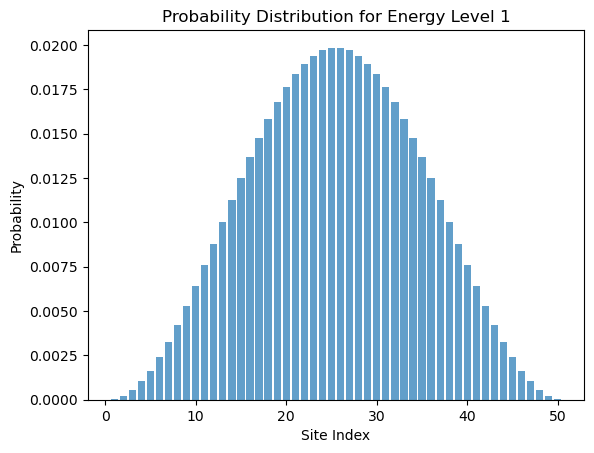

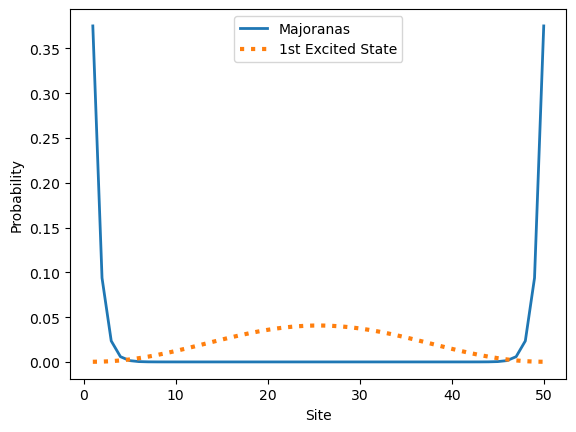

In [4]:
"""
Functions setting up the BdG Hamiltonian and solving, checking normalisations and plotting test values (has a function for both the generalised and ungeneralised t-varying quasicrystal)
"""

# # ****************************** Sec 1 ******************************
# # Setting up the BdG matrix and solving for the eigenvalues and eigenvectors

function create_normal_hamiltonian_quasi(N::Int, t1::Float64, t2::Float64, mu::Float64, sequence::Vector{Int})
    """
    Constructs the normal-state Hamiltonian H_0 of the Kitaev chain with alternating hopping terms.

    Parameters:
    N       -- Number of lattice sites
    t1      -- First hopping term
    t2      -- Second hopping term
    mu      -- Chemical potential
    sequence -- A vector of integers (1 or 2) indicating the hopping term to use between each site
    
    Returns:
    H0 -- NxN matrix representing the normal-state Hamiltonian
    """
    H0 = ComplexF64[0.0 + 0im for _ in 1:N, _ in 1:N]

    for i in 1:N
        H0[i, i] = -mu + 0im
    end

    for i in 1:N-1
        hopping_term = sequence[i] == 1 ? t1 : t2  # Select t1 or t2 based on sequence
        H0[i, i+1] = -hopping_term + 0im
        H0[i+1, i] = -hopping_term + 0im
    end

    return H0
end

function create_normal_hamiltonian_quasi_mu_generalised(N::Int, t::Float64, mu_list::Vector{Float64}, sequence::Vector{Int})
    """
    Constructs the normal-state Hamiltonian H_0 of the Kitaev chain with chemical potential varying according to a sequence.

    Parameters:
    N         -- Number of lattice sites
    t         -- Hopping term (constant)
    mu_list   -- Vector of chemical potentials
    sequence  -- A vector of integers (indices) indicating which chemical potential to use at each site

    Returns:
    H0 -- NxN matrix representing the normal-state Hamiltonian
    """
    H0 = ComplexF64[0.0 + 0im for _ in 1:N, _ in 1:N]

    for i in 1:N
        mu_index = sequence[i]
        H0[i, i] = -mu_list[mu_index] + 0im
    end

    for i in 1:N-1
        H0[i, i+1] = -t + 0im
        H0[i+1, i] = -t + 0im
    end

    return H0
end



function create_pairing_matrix(N::Int, Delta::Float64)
    """
    Constructs the pairing matrix Delta for the Kitaev chain.

    Parameters:
    N  -- Number of lattice sites
    Delta  -- Superconducting pairing term
    
    Returns:
    pairing_matrix -- NxN matrix representing the pairing interactions
    """
    pairing_matrix = ComplexF64[0.0 + 0im for _ in 1:N, _ in 1:N]
    # pairing_matrix = zeros(Float64, N, N)

    for i in 1:N-1
        pairing_matrix[i, i+1] = Delta + 0im
        pairing_matrix[i+1, i] = -Delta + 0im
    end

    return pairing_matrix
end

function create_bdg_hamiltonian(N::Int, H0::Matrix{ComplexF64}, Delta::Matrix{ComplexF64})
    """
    Constructs the 2N x 2N BdG Hamiltonian matrix using H_0 and Delta.

    Parameters:
    N  -- Number of lattice sites
    H0 -- NxN normal-state Hamiltonian matrix (hopping and chemical potential)
    Delta  -- NxN pairing matrix
    
    Returns:
    BdG Hamiltonian -- 2Nx2N matrix representing the BdG Hamiltonian
    """
    BdG = ComplexF64[0.0 + 0im for _ in 1:2*N, _ in 1:2*N]
    # BdG = zeros(Float64, 2*N, 2*N)

    BdG[1:N, 1:N] = H0
    BdG[N+1:end, N+1:end] = -H0'
    BdG[1:N, N+1:end] = Delta
    BdG[N+1:end, 1:N] = Delta'

    return BdG
end

function solve_bdg_hamiltonian(BdG::Matrix{ComplexF64})
    """
    Returns the BdG Hamiltonian eigenvalues and eigenvectors.

    Parameters:
    BdG -- 2Nx2N BdG Hamiltonian matrix
    
    Returns:
    eigenvalues -- Vector of eigenvalues
    eigenvectors -- Matrix of eigenvectors
    """
    eigenvalues, eigenvectors = eigen(BdG)
    return eigenvalues, eigenvectors
end

function check_eigenvectors_normalisation(eigenvectors::Matrix{ComplexF64}, tolerance::Float64)
    """
    Checks if the eigenvectors are normalized, i.e., each eigenvector should have a norm of 1.

    Parameters:
    eigenvectors -- Matrix of eigenvectors (2N x 2N)
    tolerance -- Float value for allowed tolerance in the normalization check
    
    Returns:
    A summary message indicating whether all eigenvectors are normalized,
    and details of any that are not normalized.
    """
    N = size(eigenvectors, 1)  # Number of eigenvectors
    results = []

    for i in 1:N
        norm_value = norm(eigenvectors[:, i])
        # # print the values of eigenvector norms if you want
        # println("Energy levels: $(i) has norm: $norm_value")

        if abs(norm_value - 1) > tolerance
            push!(results, (i, norm_value))
        end
    end

    println("Checking normalisation of eigenvectors:")
    if isempty(results)
        println("All probabilities are correctly normalized within the tolerance of $tolerance.")
    else
        println("The following eigenvectors are not normalized:")
        for (index, norm_val) in results
            println("Eigenvector $index: Norm = $norm_val")
        end
    end
end

# # ****************************** Sec 2 ******************************
# # Calculating probability distributions over sites and checking normalisation

function calculate_probability_distributions_bdg(eigenvectors::Matrix{ComplexF64})
    """
    Calculates the probability distributions of site occupancy from the eigenvectors using the BdG formalism.

    Returns:
    probabilities -- 2D array where each row corresponds to a site and each column corresponds to an energy level
    """
    N = size(eigenvectors, 1) ÷ 2  # Number of sites
    probabilities = zeros(Float64, N, size(eigenvectors, 2))

    for i in 1:size(eigenvectors, 2)  # Iterate over energy levels
        for n in 1:N  # Iterate over sites
            u_n_i = eigenvectors[n, i]  # Particle component
            v_n_i = eigenvectors[n+N, i]  # Hole component
            probabilities[n, i] = 0.5 * (abs(u_n_i)^2 + abs(v_n_i)^2)
        end
    end
    return probabilities
end

function check_probability_normalisation(probabilities::Matrix{Float64}, N::Int, tolerance::Float64)
    """
    Checks if the probabilities are correctly normalized for each energy level
    within a specified tolerance.
    
    Parameters:
    probabilities -- Nx(2N) matrix of probabilities
    N -- Number of lattice sites
    tolerance -- Float value representing the acceptable deviation from 1.0
    
    Returns:
    nothing; prints the result of the normalization check.
    """
    unnormalized_pairs = []

    for n in 0:(N-1) 
        total_probability = sum(probabilities[:, N - n] + probabilities[:, N + 1 + n])
        # # print the values of probability sums if you want
        # println("Energy levels: $(N - n) and $(N + 1 + n) -> Sum: $total_probability")
        
        if abs(total_probability - 1.0) > tolerance
            push!(unnormalized_pairs, (N - n, N + 1 + n))
        end
    end

    println("Checking normalisation of probabilities:")
    if isempty(unnormalized_pairs)
        println("All probabilities are correctly normalized within the tolerance of $tolerance.")
    else
        println("The following pairs do not sum to 1 within the tolerance of $tolerance:")
        for (i, j) in unnormalized_pairs
            println("Energy levels: $i and $j")
        end
    end
end



# # ****************************** Sec 3 ******************************
# # Plotting the probability distributions of one eigenstate for a single parameter set

function plot_probability_distribution(probabilities::Matrix{Float64}, energy_level::Int, N::Int)
    """
    Plots the probability distribution of all N sites for a specified energy level.
    """
    if energy_level < 1 || energy_level > 2*N
        error("Energy level must be between 1 and $(2*N).")
    end

    sites = 1:N
    close()
        # plot(sites, probabilities[:, energy_level], lw=3)
        PyPlot.bar(sites, probabilities[:, energy_level], alpha=0.7)
    title("Probability Distribution for Energy Level $energy_level")
    xlabel("Site Index")
    ylabel("Probability")
    
    display(gcf())

end

function plot_paired_probability_distributions(probabilities::Matrix{Float64}, N::Int)
    
    sites = 1:N
    close()
        # Plotting Majorana modes
        PyPlot.plot(sites, probabilities[:, N] + probabilities[:, N + 1], label="Majoranas", lw=2)
        # println("Total probability of Majoranas: $(sum(probabilities[:, N] + probabilities[:, N + 1]))")

        # Plotting first excited state
        PyPlot.plot(sites, probabilities[:, N - 1] + probabilities[:, N + 2], label="1st Excited State", linestyle=":", lw=3)
        # println("Total probability of first excited state: $(sum(probabilities[:, N - 1] + probabilities[:, N + 2]))")

        xlabel("Site")
        ylabel("Probability")
        legend()
    display(gcf())
end




# #****************************** Sec 4 ******************************
# # Example usage code for functions in Sec 1-3

# Parameters
N = 50
mu_list = [1.0]#, 0.5]
t = 1.0
Delta = t

# Define which generation sequence to use for all following analysis
sequence = normal_sequence


# Create matrices and find eigenvalues/eigenvectors
# H0 = create_normal_hamiltonian_quasi(N, t1, t2, mu, sequence)
H0 = create_normal_hamiltonian_quasi_mu_generalised(N, t, mu_list, sequence)

Delta_matrix = create_pairing_matrix(N, Delta)
BdG = create_bdg_hamiltonian(N, H0, Delta_matrix)

# # BdG looks good :)
# println("BdG matrix:")
# println(size(BdG))
# println(BdG)

# Solve the Hamiltonian and find probabiltiies
eigenvalues, eigenvectors = solve_bdg_hamiltonian(BdG)
probabilities = calculate_probability_distributions_bdg(eigenvectors)

# Check normalisations
check_eigenvectors_normalisation(eigenvectors, 1e-15)
check_probability_normalisation(probabilities, N, 1e-15)

# Plot single half-energy level distribution
plot_probability_distribution(probabilities, 1, N)
plot_paired_probability_distributions(probabilities, N)

In [5]:

function eigenvalue_finder_for_t_mun_generalised(N::Int, mu_list::Vector{Float64}, t_values::Vector{Float64}, sequence::Vector{Int}, Delta::Float64)
    """
    Computes the eigenvalues for a list of (t_n) sets, given a fixed (mu).

    Parameters:
    N             -- Int: Number of atomic sites in the chain
    mu            -- Float64: Fixed value of the chemical potential
    t_n_values    -- Vector of (t_n) arrays (one array per (t_n) configuration)
    sequence      -- Vector{Int}: Sequence of hopping terms
    Delta         -- Float64: Pairing constant (default 1.0)

    Returns:
    results       -- Vector of dictionaries containing the results for each (t_n) set
    """
    results::Vector{Dict{String, Any}} = []

    for t in t_values
        H0 = create_normal_hamiltonian_quasi_mu_generalised(N, t, mu_list, sequence)
        pairing_matrix = create_pairing_matrix(N, Delta)
        BdG = create_bdg_hamiltonian(N, H0, pairing_matrix)
        
        eigenvalues, eigenvectors = solve_bdg_hamiltonian(BdG)
        probabilities = calculate_probability_distributions_bdg(eigenvectors)

        push!(results, Dict(
            "mu_t_ratio" => mu_list[1] / t,
            "mu_n" => mu_list,
            "t_values" => t,
            "eigenvalues" => eigenvalues,
            "eigenvectors" => eigenvectors,
            "probabilities" => probabilities
        ))
    end

    return results
end

function calculate_paired_probabilities(results::Vector{Dict{String, Any}})
    """
    Calculates the paired probabilities for each result in the provided array.
    
    Parameters:
    results -- Array of dictionaries containing eigenvalues, eigenvectors, and probabilities
    
    Returns:
    Nothing; the results are modified in place to include paired probabilities.
    """
    for result in results
        probabilities = result["probabilities"]
        N = size(probabilities, 1)
        
        paired_probabilities = zeros(Float64, N)

        for n in 1:N
            paired_probabilities[n] = probabilities[n, N] + probabilities[n, N + 1]
        end
        
        result["paired_probabilities"] = paired_probabilities
    end
end

function calculate_paired_eigenvectors(results::Vector{Dict{String, Any}})
    """
    Calculates the paired eigenvectors for each result in the provided array. The eigenvectors are paired such that
    the original 2Nx2N eigenvector matrix is reduced to an NxN matrix by pairing the rows and columns.
    
    Parameters:
    results -- Array of dictionaries containing eigenvalues, eigenvectors, and probabilities
    
    Returns:
    Nothing; the results are modified in place to include paired eigenvectors as NxN matrices.
    """
    for result in results
        eigenvectors = result["eigenvectors"]
        N = size(eigenvectors, 1) ÷ 2
        
        paired_eigenvectors = zeros(ComplexF64, N, N)

        for i in 1:N
            for j in 1:N
                paired_eigenvectors[i, j] = eigenvectors[i, j] + eigenvectors[N + i, N + j]
            end
        end

        result["paired_eigenvectors"] = paired_eigenvectors
    end
end




# Parameters
# N = 20
# t1 = 0.8
# t2 = 1.2
t_values = collect(range(3.0, stop=0.3, length=21))
# print(typeof(t_values))


results = eigenvalue_finder_for_t_mun_generalised(N, mu_list, t_values, sequence, Delta)

calculate_paired_probabilities(results)

calculate_paired_eigenvectors(results)

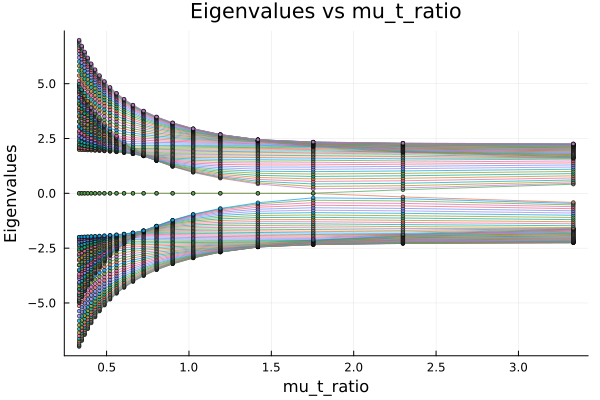

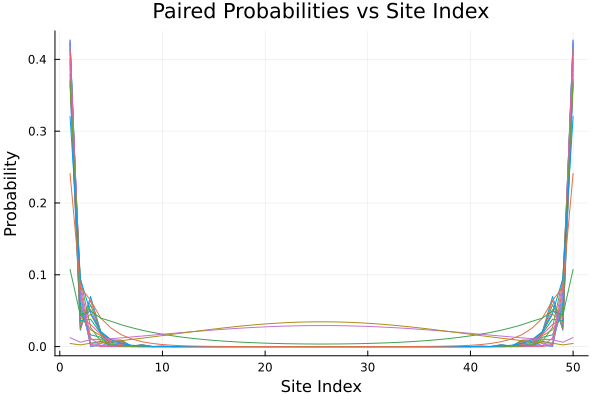

[0.3333333333333333, 0.34904013961605584, 0.3663003663003663, 0.3853564547206165, 0.4065040650406504, 0.4301075268817204, 0.4566210045662101, 0.48661800486618, 0.5208333333333334, 0.5602240896358543, 0.6060606060606061, 0.6600660066006601, 0.7246376811594204, 0.8032128514056224, 0.9009009009009008, 1.0256410256410258, 1.1904761904761905, 1.4184397163120568, 1.7543859649122808, 2.2988505747126435, 3.3333333333333335]


In [8]:
"""
Functions to plot the eigenvalues and spatial probability distributions of the Hamiltonian (compatible with both generalised and ungeneralised t-varying quasicrystals)
"""

function plot_eigenvalues(results::Vector{Dict{String, Any}}, variable::String = "mu_t_ratio", eigenvalues_column::String = "eigenvalues")
    """
    Plots eigenvalues as a function of mu.

    Parameters:
    results             -- Vector of dictionaries containing results.
    variable            -- String: The variable used for the x-axis (mu_t_ratio).
    eigenvalues_column  -- String: The column containing eigenvalues.
    """
    close()
    plt = Plots.scatter(legend=false, xlabel=variable, ylabel="Eigenvalues", title="Eigenvalues vs $variable", grid=true)
    
    x_values = [result[variable] for result in results]
    all_eigenvalues = [result[eigenvalues_column] for result in results]
    
    num_eigenvalues = length(all_eigenvalues[1])
    
    for i in 1:num_eigenvalues
        eigenvalue_line = [eigenvalues[i] for eigenvalues in all_eigenvalues]
        
        plot!(x_values, eigenvalue_line, marker=:circle, ms=2, alpha=0.7)
    end

    display(plt)
end


# # Function to plot paired probabilities for each mu value
function plot_paired_probabilities(results::Vector{Dict{String, Any}}, N::Int)
    """
    Plots paired probabilities for each mu/t_ratio on the same plot as line plots.

    Parameters:
    results -- Vector of dictionaries containing mu_values and paired_probabilities.
    N       -- Int: Number of sites in the chain.
    """  
    close()

        plt = Plots.plot(legend=false, xlabel="Site Index", ylabel="Probability", title="Paired Probabilities vs Site Index", grid=true)

        for result in results
            mu_value = result["mu_t_ratio"]
            paired_probabilities = result["paired_probabilities"]

            # println("mu = $mu_value")
            # println("Paired Probabilities: ", paired_probabilities)

            plot!(1:N, paired_probabilities, label="mu/t = $mu_value")

        end
    display(plt)
end

# Plot eigenvalues
# plot_eigenvalues(results, "mu_t_ratio", "eigenvalues")

plot_eigenvalues(results, "mu_t_ratio", "eigenvalues")


println([row["mu_t_ratio"] for row in results])
plot_paired_probabilities(results, N)